<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [4]:
image = np.array(Image.open('/content/drive/MyDrive/Pattern Recognition/Fall-23-APML-Public-main/Fall-23-APML-Public-main/Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





(100, 100, 3)
(100, 100)


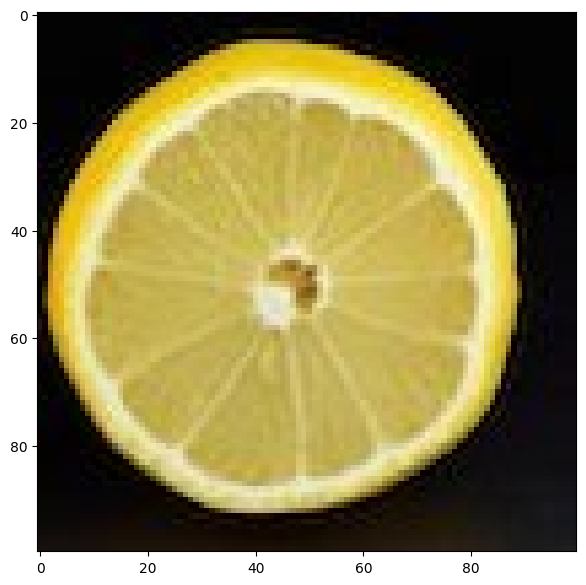

In [10]:
print(image.shape)
img_single_channel = image[:,:,2]
print(img_single_channel.shape)
plt.figure(figsize=(7,7))
plt.imshow(image)


## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

In the average image we do average of main color channel so it is not as detailed and informative as original image. So, we can say original image is better.


Original Image Shape: (100, 100, 3)
Average Channel Image Shape: (100, 100)


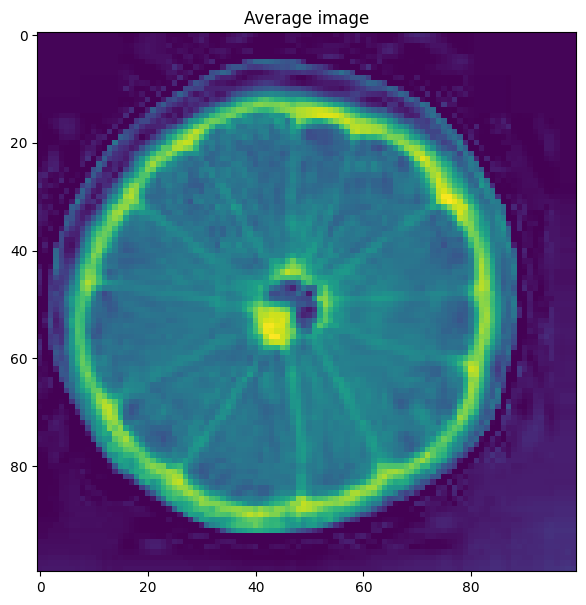

In [16]:
# Print the shape of the original image
print("Original Image Shape:", np.array(image).shape)

# Convert the image to a NumPy array
image_array = np.array(image)

# Calculate the average of all three color channels
img_average_channel = np.mean(image_array, axis=2).astype(np.uint8)

# Print the shape of img_average_channel to check that it has the same number of pixels as the original image
print("Average Channel Image Shape:", img_average_channel.shape)

# Use plt.imshow to plot the original image
plt.figure(figsize=(7,7))
plt.imshow(img_single_channel)
plt.title("Average image")
plt.show()


## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

A matrix which has all the element 0 execpt diagonal elements which are 1 and it is always square matrix.
The product of any matrix with identity matrix is always a given matrix without any change.


In [ ]:
identity_matrix = np.identity(img_average_channel.shape[1])
print(identity_matrix[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [ ]:
rows = np.arange(img_average_channel.shape[0])
np.random.shuffle(rows)
print(rows)

[70 94 69 15  9 24 52 49 21 59 77 76 61 64 30 53 75 28 31 74 44 46 58 23
 60 85 97  3 80 95 29 19  4 17 27 48 36  0 10 26 89  8 67 62 68 86 99  5
  6 34 91 20 90 13 92 71 18 35 84 88  2 57 32  1 45  7 83 51 63 54 65 66
 39 50 55 93 87 78 81 33 96 98 42 38 79 41 14 11 82 73 25 72 56 47 22 43
 37 40 12 16]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


Matrix T is a transformation of an identity matrix where the row has been rearrange according to the order specified by the given row. It suffles the row of the identity matrix to create a new matrix T.

In [ ]:
T = identity_matrix[rows]
print(T.shape)

(100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

The dot product of a row of the transform matrix T and a column of an original image is essentially deciding where each row of the original image should be placed in the transformed image.

(100, 100)


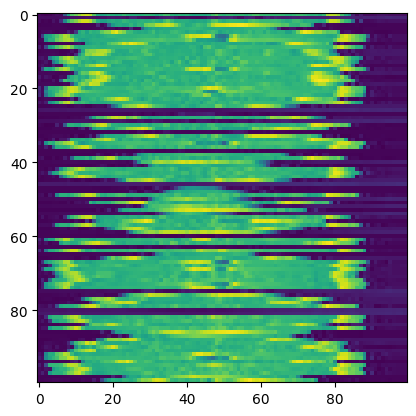

In [ ]:
transformed_image = np.matmul(T, img_average_channel)
print(transformed_image.shape)
plt.imshow(transformed_image)
plt.show()

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

The matrix T is invertible if and only if the rows are linearly independent, which can be verified using row reduction or determinant calculation.

(100, 100)


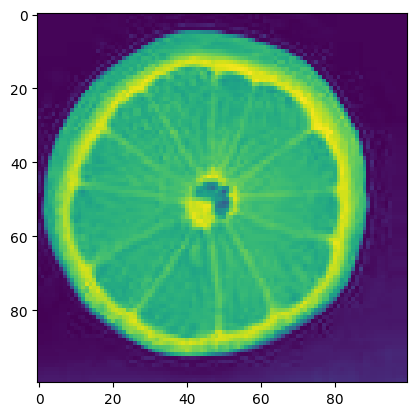

In [ ]:
Tinv = inv(T)
print(Tinv.shape)
original_image = np.matmul(Tinv, transformed_image)
plt.imshow(original_image)
plt.show()

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.

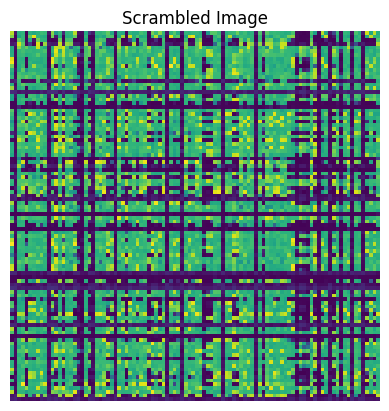

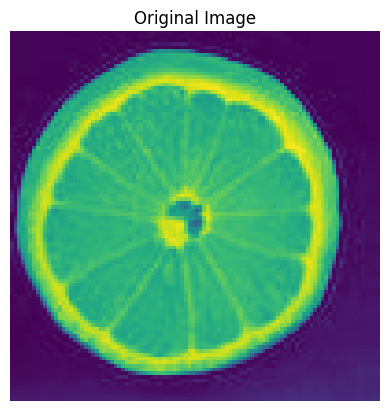

In [18]:
num_rows, num_cols = img_average_channel.shape

permutation = np.random.permutation(num_rows)
row_indices = permutation.copy()
np.random.shuffle(permutation)
col_indices = permutation

permuted_img = img_average_channel[row_indices][:, col_indices]

# Plot the scrambled image
plt.imshow(permuted_img)
plt.title("Scrambled Image")
plt.axis('off')
plt.show()

inverse_row_indices = np.argsort(row_indices)
inverse_col_indices = np.argsort(col_indices)

orig_img = permuted_img[inverse_row_indices][:, inverse_col_indices]

# Plot the recovered original image
plt.imshow(orig_img)
plt.title("Original Image")
plt.axis('off')
plt.show()

